<a href="https://colab.research.google.com/github/Aakanksha0511/SelfProjects/blob/main/MLCREDITFRAUDDETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix, plot_confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
creditcard = '/content/drive/MyDrive/Colab Notebooks/CREDITCARDFRAUDDATA/creditcard.csv'

In [ ]:
df = pd.read_csv(creditcard)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,-1.440241,-0.511918,0.607878,-0.627645,1.023032,-0.888334,0.413444,1.860351,1.316597,1.094512,-0.791037,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
# Check the distribution of the credit card fraud cases 
class_proportion = df['Class'].value_counts()
class_proportion

0    283253
1       473
Name: Class, dtype: int64

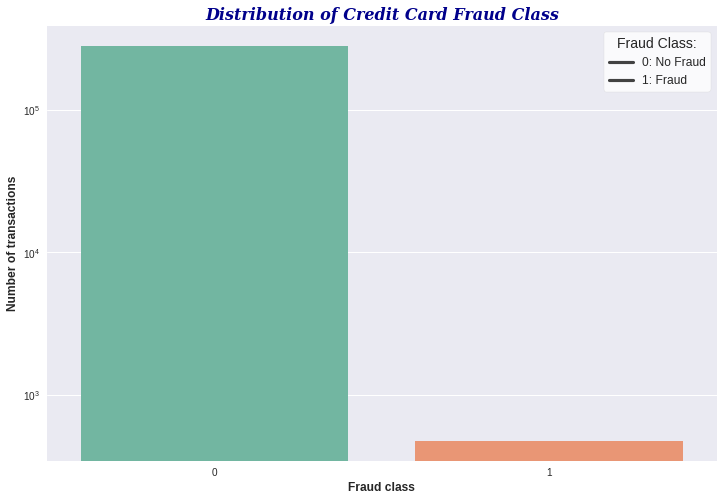

In [ ]:
# Plotting a barchart to see the the distribution of the credit card fraud cases
plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}
font3 = {'weight': 'normal', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(class_proportion.index, class_proportion.values, palette='Set2')
ax.set_title('Distribution of Credit Card Fraud Class', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Number of transactions', fontdict=font2)
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels=['0: No Fraud', '1: Fraud'], prop= font3, 
          title ='Fraud Class:', title_fontsize=14,
          frameon=True, facecolor='white')
plt.show()

In [ ]:
df['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [ ]:
# Arrange the dataset into features matrix and target vector
# Drop the 'Time' variable as it does not that much help our analysis
X = df.drop(columns=(['Time', 'Class']))
y = df['Class']

In [ ]:
# Make a SMOTE instance, then fit and apply it in one step 
# to create an oversampled version of our dataset.

sm = SMOTE(sampling_strategy='auto', random_state=3, k_neighbors=5)
X_oversampled , y_oversampled = sm.fit_resample(X, y)

In [ ]:
# Summarize the fraud class distribution of the new SMOTE-transformed dataset
unique_original, counts_original = np.unique(y, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original fraud class distribution:', dict(zip(unique_original, counts_original)))
print('New transformed fraud class distribution:',dict(zip(unique_oversampled, counts_oversampled)))

Original fraud class distribution: {0: 283253, 1: 473}
New transformed fraud class distribution: {0: 283253, 1: 283253}


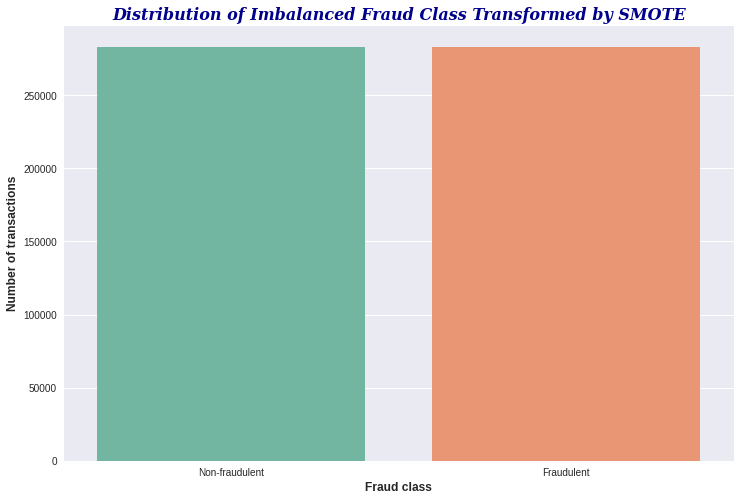

In [ ]:
# Now visualize the SMOTE-transformed target variable
plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y_oversampled, palette='Set2', ax=ax)
ax.set_title('Distribution of Imbalanced Fraud Class Transformed by SMOTE', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels(['Non-fraudulent', 'Fraudulent'])
ax.set_ylabel('Number of transactions', fontdict=font2)
plt.show()

In [ ]:
# Separate the transformed features matrix and target vector into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)

In [ ]:
# Instantiate and fit the model
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Model Evalution -classification accuracy
training_rfc_accuracy = rfc.score(X_train, y_train)
testing_rfc_accuracy = rfc.score(X_test, y_test)

print("Training RFC Accuracy:", training_rfc_accuracy)
print("Testing RFC Accuracy:", testing_rfc_accuracy )

Training RFC Accuracy: 1.0
Testing RFC Accuracy: 0.9998587839889287


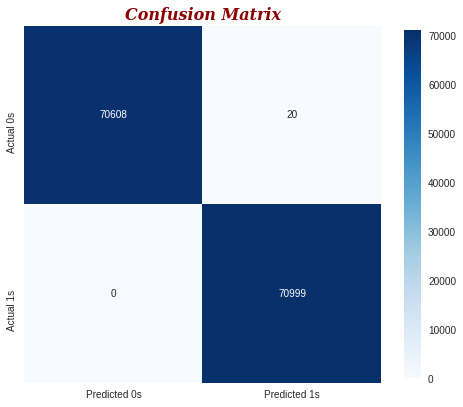

In [ ]:
# Plotting the confusion matrix 
fig, ax = plt.subplots(figsize=(8, 8))
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkRed'}
font2 = {'weight': 'bold', 'size': 12}

sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), 
            cmap='Blues', 
            square=True,
            annot=True,
            fmt='d',
            cbar_kws={'shrink': 0.8},
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
ax.set_title('Confusion Matrix', fontdict=font1)
plt.show()

In [ ]:
# Model evaluation - Sensitivity, Specificity and Precision 

TN, FP, FN, TP = confusion_matrix(y_test, rfc.predict(X_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 70608
False Positives: 20
False Negatives: 0
True Positives: 70999

Sensitivity: 1.0
Specificity: 0.9997168261879141
Precision: 0.9997183852208564


In [ ]:
# Check the predicted probabilities for every observation in the test data subset 
# Note that the default classification threshold is 0.5

testing_probabilities= rfc.predict_proba(X_test)
testing_probabilities

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.98666667, 0.01333333],
       [0.99333333, 0.00666667],
       [0.        , 1.        ]])

In [ ]:
# Convert the testing probabilities into a dataframe
testing_probabilities_df = pd.DataFrame(testing_probabilities, columns=['1 - 𝑝(X_test)', '𝑝(X_test)'])
testing_probabilities_df.head()

,1 - 𝑝(X_test),𝑝(X_test)
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
# Get predictions
rfc.predict(X_test)

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
# Model evaluation -AUC
# Calculate AUC for both training and testing subsets
# Only probabilities being in the positive class is needed for the calculation, that is the second column
training_rfc_AUC = roc_auc_score(y_train, rfc.predict_proba(X_train)[:, 1]) 
testing_rfc_AUC = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

print("Training RFC AUC:", training_rfc_AUC)
print("Testing RFC AUC:", testing_rfc_AUC)

Training RFC AUC: 1.0
Testing RFC AUC: 0.9999917968177298


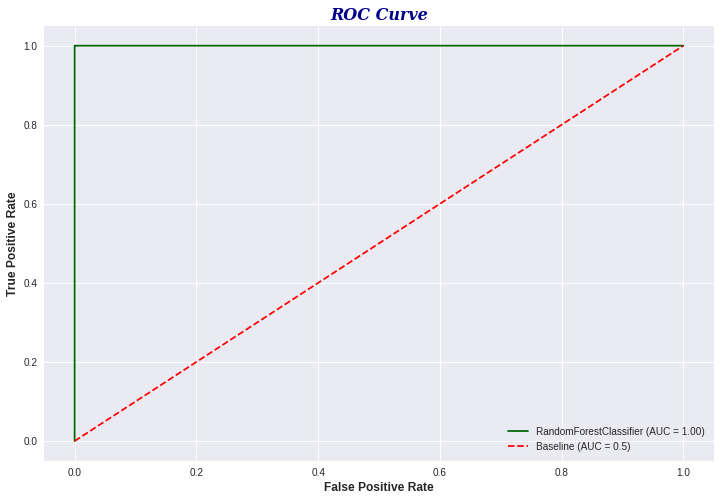

In [ ]:
# Visualize the ROC curve 
# http://www.navan.name/roc/

plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(rfc, X_test, y_test, color='darkgreen', ax=ax)
plt.plot([0, 1], [0, 1], ls='--', color='red', label='Baseline (AUC = 0.5)')
ax.legend(loc='lower right')
ax.set_title('ROC Curve', fontdict=font1)
ax.set_xlabel('False Positive Rate', fontdict=font2)
ax.set_ylabel('True Positive Rate', fontdict=font2)
plt.show()